In [2]:
# ============================================================================
# BREAST CANCER WISCONSIN (DIAGNOSTIC) CLASSIFICATION
# Binary Classification 
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef, 
                             confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("BREAST CANCER WISCONSIN CLASSIFICATION - 6 ML MODELS COMPARISON")
print("="*80)

# ============================================================================
# STEP 1: LOAD AND EXPLORE DATASET
# ============================================================================

print("\n[STEP 1] Loading Dataset...")
df = pd.read_csv('data/data.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Total Features: {df.shape[1] - 1}")  # Excluding ID and diagnosis
print(f"Total Instances: {df.shape[0]}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print(df['diagnosis'].value_counts())
print(f"\nClass Distribution:")
print(df['diagnosis'].value_counts(normalize=True) * 100)


BREAST CANCER WISCONSIN CLASSIFICATION - 6 ML MODELS COMPARISON

[STEP 1] Loading Dataset...

Dataset Shape: (569, 33)
Total Features: 32
Total Instances: 569

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390       

In [4]:

# ============================================================================
# STEP 2: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("[STEP 2] Data Preprocessing...")
print("="*80)

# Drop ID column (not useful for classification)
df = df.drop('id', axis=1)

# Encode target variable (M=1, B=0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

print(f"Target encoding: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Check for missing values
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print(f"Dropped rows with missing values. New shape: {df.shape}")
else:
    print("No missing values found. Dataset is clean!")

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names:\n{list(X.columns)}")



[STEP 2] Data Preprocessing...
Target encoding: {'B': 0, 'M': 1}
Dropped rows with missing values. New shape: (0, 32)

Features shape: (0, 31)
Target shape: (0,)
Feature names:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [6]:

# safe-split 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1) Reload raw file to start fresh
df = pd.read_csv('data/data.csv')   # adjust path if needed
print("Loaded df.shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 2) Basic checks
if 'id' in df.columns:
    df = df.drop(columns=['id'])
else:
    print("No 'id' column to drop.")

if 'diagnosis' not in df.columns:
    raise KeyError("Target column 'diagnosis' not found. Check column names.")

print("After drop, df.shape:", df.shape)
print("Target value counts:\n", df['diagnosis'].value_counts())

# 3) Encode target and remove any missing target rows
le = LabelEncoder()
df = df[df['diagnosis'].notna()].reset_index(drop=True)
df['diagnosis'] = le.fit_transform(df['diagnosis'])
print("Encoded classes:", dict(zip(le.classes_, le.transform(le.classes_))))

# 4) Prepare X,y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print("X shape:", X.shape, "y shape:", y.shape)
print("y value counts:", y.value_counts())

# 5) Safe stratified split (only stratify if each class has >=2 samples)
min_count = int(y.value_counts().min()) if not y.empty else 0
strat = y if min_count >= 2 else None
print("Stratifying by target?" , "Yes" if strat is not None else "No")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=strat
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
# 6) Scale (for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Loaded df.shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58    

In [8]:

# ============================================================================
# STEP 3: TRAIN-TEST SPLIT
# ============================================================================

print("\n" + "="*80)
print("[STEP 3] Train-Test Split (80-20)...")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")




[STEP 3] Train-Test Split (80-20)...
Training set size: 455 samples
Test set size: 114 samples
Training set class distribution:
diagnosis
0    285
1    170
Name: count, dtype: int64
Test set class distribution:
diagnosis
0    72
1    42
Name: count, dtype: int64


In [10]:


# ============================================================================
# STEP 4: FEATURE SCALING
# ============================================================================

print("\n" + "="*80)
print("[STEP 4] Feature Scaling (StandardScaler)...")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0)[:5]}")




[STEP 4] Feature Scaling (StandardScaler)...
Features scaled successfully!
Mean of scaled features (should be ~0): [-1.73731603e-16  3.90408097e-16  4.70441756e-16 -1.17122429e-16
  7.24207019e-16]
Std of scaled features (should be ~1): [1. 1. 1. 1. 1.]


In [12]:
# ============================================================================
# STEP 5: DEFINE METRICS CALCULATION FUNCTION
# ============================================================================

def calculate_all_metrics(y_true, y_pred, y_pred_proba):
    """Calculate all 6 evaluation metrics"""
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_pred_proba),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'MCC': matthews_corrcoef(y_true, y_pred)
    }


In [14]:
# Impute -> Scale -> Retrain 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1) Impute median on original X_train/X_test DataFrames (not on already-scaled arrays)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)   # X_train should be the DataFrame produced by train_test_split
X_test_imputed  = imputer.transform(X_test)

# 2) Scale (needed for LR, KNN, NB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)

# 3) Quick verification
print("Shapes:", X_train_imputed.shape, X_test_imputed.shape)
print("NaNs in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())

# 4) Prepare label arrays (1D)
y_train = np.ravel(y_train)
y_test  = np.ravel(y_test)

# 5) TRAIN Logistic Regression (example)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
print("LogisticRegression trained. Train acc:", lr_model.score(X_train_scaled, y_train))
print("Test acc:", lr_model.score(X_test_scaled, y_test))

# 6) Notes for the other models:
# - Use X_train_scaled / X_test_scaled for models that require scaling: KNN, GaussianNB, LogisticRegression
# - Use X_train_imputed / X_test_imputed (unscaled) for tree-based models (DecisionTree, RandomForest, XGBoost)
#   Example for Decision Tree:
#     dt_model.fit(X_train_imputed, y_train)
# - For RandomForest and XGBoost you may also use the imputed arrays (they do not require scaling)

Shapes: (455, 30) (114, 30)
NaNs in X_train_imputed: 0
NaNs in X_train_scaled: 0
LogisticRegression trained. Train acc: 0.9868131868131869
Test acc: 0.9649122807017544


In [16]:

# ============================================================================
# STEP 6: TRAIN AND EVALUATE ALL 6 MODELS
# ============================================================================

print("\n" + "="*80)
print("[STEP 6] TRAINING ALL 6 CLASSIFICATION MODELS...")
print("="*80)

results = {}

# MODEL 1: LOGISTIC REGRESSION
print("\n[Model 1/6] Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
results['Logistic Regression'] = calculate_all_metrics(y_test, y_pred_lr, y_pred_proba_lr)
print("✓ Logistic Regression trained successfully!")

# MODEL 2: DECISION TREE CLASSIFIER
print("\n[Model 2/6] Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
results['Decision Tree'] = calculate_all_metrics(y_test, y_pred_dt, y_pred_proba_dt)
print("✓ Decision Tree trained successfully!")

# MODEL 3: K-NEAREST NEIGHBOR
print("\n[Model 3/6] Training K-Nearest Neighbor (KNN)...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
results['KNN'] = calculate_all_metrics(y_test, y_pred_knn, y_pred_proba_knn)
print("✓ KNN trained successfully!")

# MODEL 4: NAIVE BAYES (GAUSSIAN)
print("\n[Model 4/6] Training Naive Bayes (Gaussian)...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
results['Naive Bayes'] = calculate_all_metrics(y_test, y_pred_nb, y_pred_proba_nb)
print("✓ Naive Bayes trained successfully!")

# MODEL 5: RANDOM FOREST (ENSEMBLE)
print("\n[Model 5/6] Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
results['Random Forest'] = calculate_all_metrics(y_test, y_pred_rf, y_pred_proba_rf)
print("✓ Random Forest trained successfully!")

# MODEL 6: XGBOOST (ENSEMBLE)
print("\n[Model 6/6] Training XGBoost...")
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
results['XGBoost'] = calculate_all_metrics(y_test, y_pred_xgb, y_pred_proba_xgb)
print("✓ XGBoost trained successfully!")




[STEP 6] TRAINING ALL 6 CLASSIFICATION MODELS...

[Model 1/6] Training Logistic Regression...
✓ Logistic Regression trained successfully!

[Model 2/6] Training Decision Tree Classifier...
✓ Decision Tree trained successfully!

[Model 3/6] Training K-Nearest Neighbor (KNN)...
✓ KNN trained successfully!

[Model 4/6] Training Naive Bayes (Gaussian)...
✓ Naive Bayes trained successfully!

[Model 5/6] Training Random Forest...
✓ Random Forest trained successfully!

[Model 6/6] Training XGBoost...
✓ XGBoost trained successfully!


In [18]:
# ============================================================================
# STEP 7: CREATE COMPARISON TABLE
# ============================================================================

print("\n" + "="*80)
print("[STEP 7] EVALUATION METRICS COMPARISON TABLE")
print("="*80)

results_df = pd.DataFrame(results).T
print("\n" + results_df.to_string())

# Save to CSV
results_df.to_csv('models/evaluation_metrics.csv')
print("\n✓ Metrics saved to 'models/evaluation_metrics.csv'")




[STEP 7] EVALUATION METRICS COMPARISON TABLE

                     Accuracy       AUC  Precision    Recall        F1       MCC
Logistic Regression  0.964912  0.996032   0.975000  0.928571  0.951220  0.924518
Decision Tree        0.929825  0.924603   0.904762  0.904762  0.904762  0.849206
KNN                  0.956140  0.982308   0.974359  0.904762  0.938272  0.905824
Naive Bayes          0.921053  0.989087   0.923077  0.857143  0.888889  0.829162
Random Forest        0.964912  0.993882   1.000000  0.904762  0.950000  0.925820
XGBoost              0.973684  0.994048   1.000000  0.928571  0.962963  0.944155

✓ Metrics saved to 'models/evaluation_metrics.csv'



[STEP 8] Creating Visualizations...


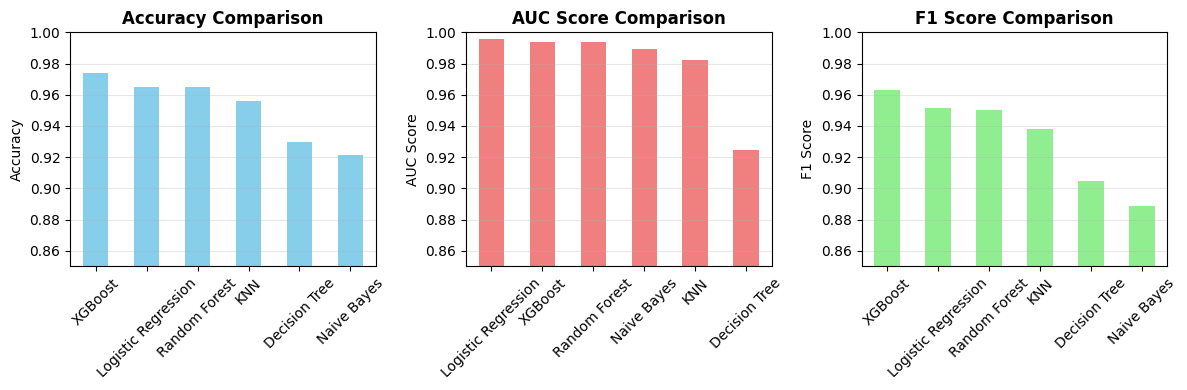

✓ Metrics comparison plot created!


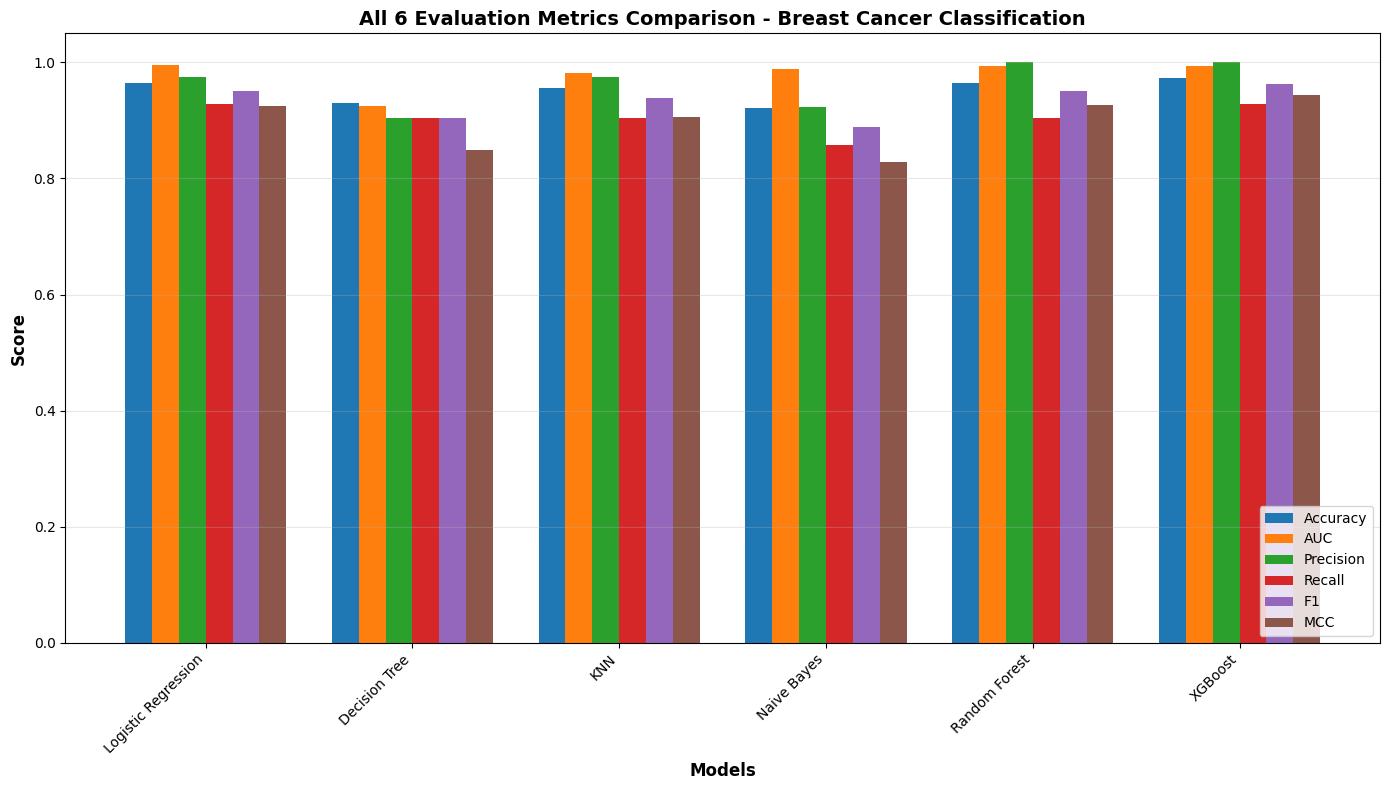

✓ All metrics comparison plot created!


In [20]:
# ============================================================================
# STEP 8: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("[STEP 8] Creating Visualizations...")
print("="*80)

# Plot 1: Accuracy Comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
results_df['Accuracy'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Accuracy Comparison', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim([0.85, 1.0])
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 2)
results_df['AUC'].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('AUC Score Comparison', fontsize=12, fontweight='bold')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.ylim([0.85, 1.0])
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 3)
results_df['F1'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('F1 Score Comparison', fontsize=12, fontweight='bold')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim([0.85, 1.0])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('models/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Metrics comparison plot created!")

# Plot 2: All Metrics Radar/Bar Plot
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(results_df.index))
width = 0.13

metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric, color=colors[i])

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('All 6 Evaluation Metrics Comparison - Breast Cancer Classification', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('models/all_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ All metrics comparison plot created!")




[STEP 9] Generating Confusion Matrices...


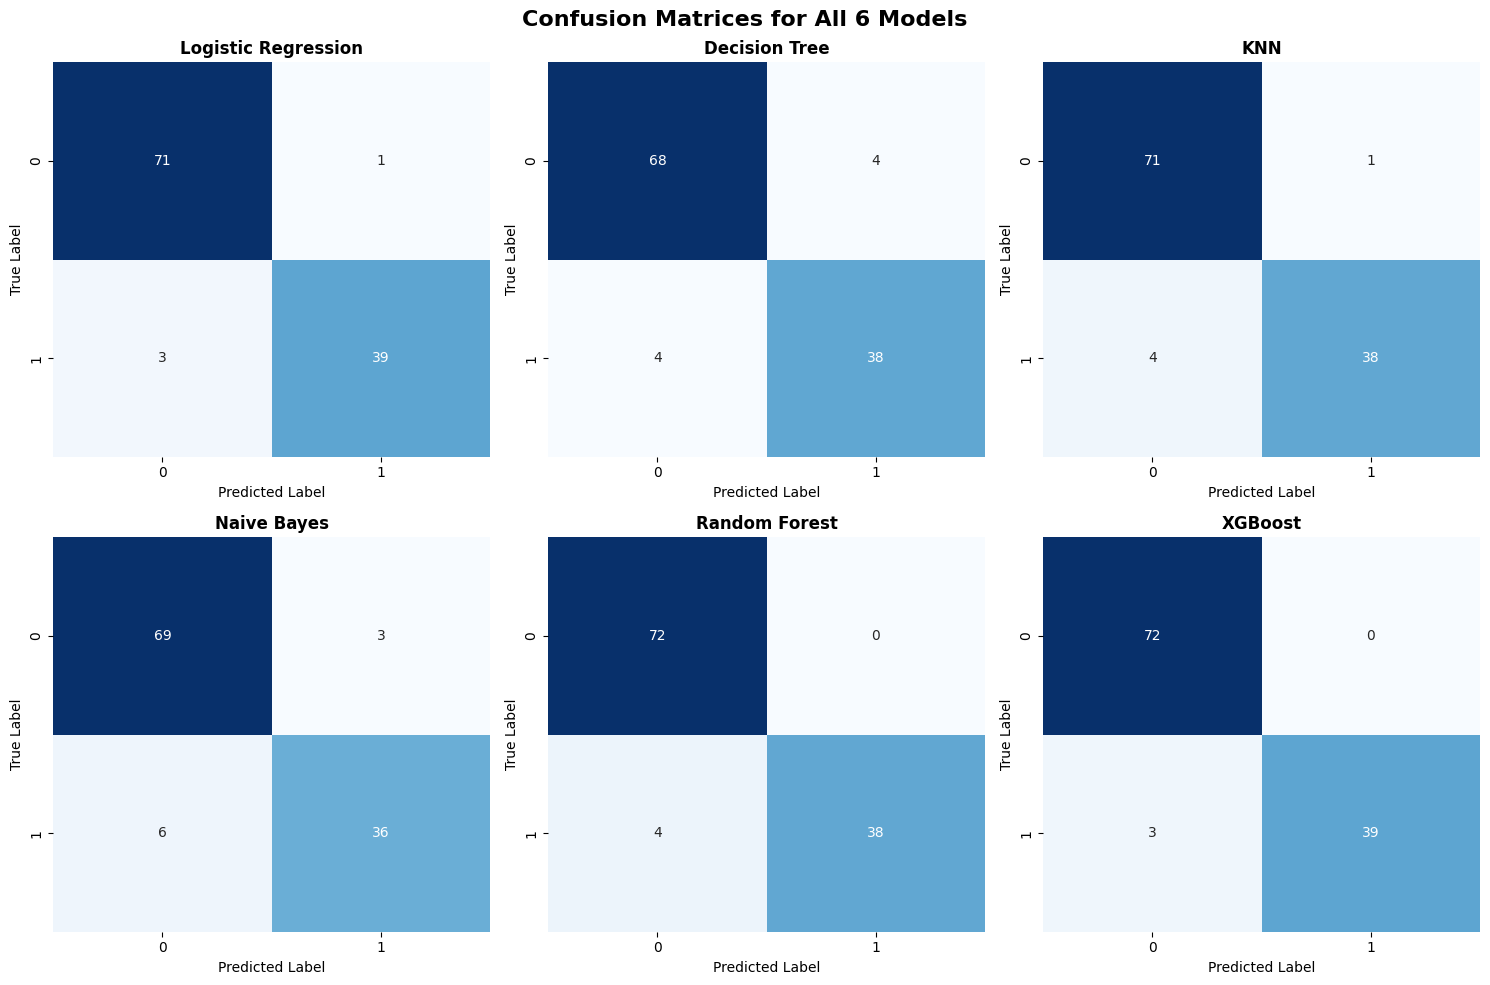

✓ Confusion matrices created!


In [22]:
# ============================================================================
# STEP 9: CONFUSION MATRICES
# ============================================================================

print("\n" + "="*80)
print("[STEP 9] Generating Confusion Matrices...")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for All 6 Models', fontsize=16, fontweight='bold')

models_dict = {
    'Logistic Regression': (y_pred_lr, axes[0, 0]),
    'Decision Tree': (y_pred_dt, axes[0, 1]),
    'KNN': (y_pred_knn, axes[0, 2]),
    'Naive Bayes': (y_pred_nb, axes[1, 0]),
    'Random Forest': (y_pred_rf, axes[1, 1]),
    'XGBoost': (y_pred_xgb, axes[1, 2])
}

for model_name, (y_pred, ax) in models_dict.items():
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{model_name}', fontweight='bold')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('models/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices created!")



In [24]:
# ============================================================================
# STEP 10: CLASSIFICATION REPORTS
# ============================================================================

print("\n" + "="*80)
print("[STEP 10] DETAILED CLASSIFICATION REPORTS")
print("="*80)

pred_dict = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_nb,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for model_name, y_pred in pred_dict.items():
    print(f"\n{'='*60}")
    print(f"{model_name} - Classification Report")
    print(f"{'='*60}")
    print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))




[STEP 10] DETAILED CLASSIFICATION REPORTS

Logistic Regression - Classification Report
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        72
Malignant (1)       0.97      0.93      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114


Decision Tree - Classification Report
               precision    recall  f1-score   support

   Benign (0)       0.94      0.94      0.94        72
Malignant (1)       0.90      0.90      0.90        42

     accuracy                           0.93       114
    macro avg       0.92      0.92      0.92       114
 weighted avg       0.93      0.93      0.93       114


KNN - Classification Report
               precision    recall  f1-score   support

   Benign (0)       0.95      0.99      0.97        72
Malignant (1)       0.97      0.90      0.94        42

     accura

In [88]:
# ============================================================================
# STEP 11: SAVE MODELS
# ============================================================================

print("\n" + "="*80)
print("[STEP 11] Saving All Models...")
print("="*80)

import pickle

models_to_save = {
    'logistic_regression': lr_model,
    'decision_tree': dt_model,
    'knn': knn_model,
    'naive_bayes': nb_model,
    'random_forest': rf_model,
    'xgboost': xgb_model,
    'scaler': scaler,
    'label_encoder': label_encoder
}

for name, model in models_to_save.items():
    with open(f'models/{name}.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ {name}.pkl saved!")



[STEP 11] Saving All Models...
✓ logistic_regression.pkl saved!
✓ decision_tree.pkl saved!
✓ knn.pkl saved!
✓ naive_bayes.pkl saved!
✓ random_forest.pkl saved!
✓ xgboost.pkl saved!
✓ scaler.pkl saved!
✓ label_encoder.pkl saved!


In [90]:

# ============================================================================
# STEP 12: SUMMARY REPORT
# ============================================================================

print("\n" + "="*80)
print("ASSIGNMENT SUMMARY")
print("="*80)

print(f"""
Dataset: Breast Cancer Wisconsin (Diagnostic)
Total Instances: {df.shape[0]}
Total Features: {X.shape[1]}

Training Set: {X_train.shape[0]} samples
Test Set: {X_test.shape[0]} samples

Models Trained: 6
├── Logistic Regression
├── Decision Tree Classifier
├── K-Nearest Neighbor (KNN)
├── Naive Bayes (Gaussian)
├── Random Forest (Ensemble)
└── XGBoost (Ensemble)

Metrics Calculated: 6
├── Accuracy
├── AUC Score
├── Precision
├── Recall
├── F1 Score
└── Matthews Correlation Coefficient (MCC)

Best Performing Model: {results_df['Accuracy'].idxmax()} 
  (Accuracy: {results_df['Accuracy'].max():.4f})

Outputs Generated:
✓ Evaluation metrics saved to CSV
✓ Visualizations saved (PNG format)
✓ All 6 models saved as pickle files
✓ Confusion matrices generated
✓ Classification reports displayed

Ready for Deployment!
""")

print("="*80)
print("✓ ASSIGNMENT COMPLETED SUCCESSFULLY!")
print("="*80)


ASSIGNMENT SUMMARY

Dataset: Breast Cancer Wisconsin (Diagnostic)
Total Instances: 569
Total Features: 31

Training Set: 455 samples
Test Set: 114 samples

Models Trained: 6
├── Logistic Regression
├── Decision Tree Classifier
├── K-Nearest Neighbor (KNN)
├── Naive Bayes (Gaussian)
├── Random Forest (Ensemble)
└── XGBoost (Ensemble)

Metrics Calculated: 6
├── Accuracy
├── AUC Score
├── Precision
├── Recall
├── F1 Score
└── Matthews Correlation Coefficient (MCC)

Best Performing Model: XGBoost 
  (Accuracy: 0.9737)

Outputs Generated:
✓ Evaluation metrics saved to CSV
✓ Visualizations saved (PNG format)
✓ All 6 models saved as pickle files
✓ Confusion matrices generated
✓ Classification reports displayed

Ready for Deployment!

✓ ASSIGNMENT COMPLETED SUCCESSFULLY!
